### Импорты

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import os
import matplotlib.lines as lines
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)

### Загрузка датасета в PD

In [2]:
df = pd.read_csv("DataEngineer.csv")
df.head(3)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,Data Engineer,$80K-$150K (Glassdoor est.),Company Description\nSagence is a management a...,4.5,Sagence\n4.5,"New York, NY","Chicago, IL",1 to 50 employees,2009,Company - Private,Consulting,Business Services,$10 to $25 million (USD),"WCI Consulting, PwC",-1
1,Senior Data Engineer (Healthcare Domain experi...,$80K-$150K (Glassdoor est.),"Key Responsibilities\n\n- Architect, build, an...",3.4,Enterprise Integration\n3.4,"New York, NY","Jacksonville, FL",51 to 200 employees,1998,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),-1,-1
2,Data Engineers,$80K-$150K (Glassdoor est.),Overview\n\nJob description\n\nPosition Overvi...,5.0,Maestro Technologies\n5.0,"New York, NY","Trenton, NJ",51 to 200 employees,2003,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),-1,-1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2528 entries, 0 to 2527
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          2528 non-null   object 
 1   Salary Estimate    2528 non-null   object 
 2   Job Description    2528 non-null   object 
 3   Rating             2528 non-null   float64
 4   Company Name       2528 non-null   object 
 5   Location           2528 non-null   object 
 6   Headquarters       2528 non-null   object 
 7   Size               2528 non-null   object 
 8   Founded            2528 non-null   int64  
 9   Type of ownership  2528 non-null   object 
 10  Industry           2528 non-null   object 
 11  Sector             2528 non-null   object 
 12  Revenue            2528 non-null   object 
 13  Competitors        2528 non-null   object 
 14  Easy Apply         2528 non-null   object 
dtypes: float64(1), int64(1), object(13)
memory usage: 296.4+ KB


####  Очистка и подготовка данных для работы

In [9]:
#Привидение к общим значениям названий столбцов
df.columns = [x.lower().replace(' ', '_') for x in df.columns.tolist()]

In [10]:
#Коррекция значений столбца company_name
df['company_name'] = df['company_name'].apply(lambda x: x.split('\n')[0])

# 10.Основные цвета hh.ru

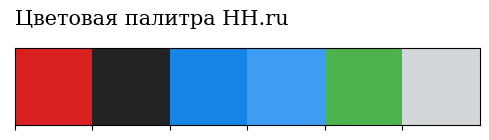

In [12]:
# Palette
color_map = ['#d92121', '#d92121', '#222324','#222324', '#1785e5', '#1785e5', '#3c9df2', '#3c9df2', '#4bb24e', '#4bb24e', '#d4d7d9', '#d4d7d9']
sns.palplot(color_map[0::2])

color_map_axis = ['#1785e5' for _ in range(len(color_map))]
color_map_axis[0] = color_map_axis[1] = color_map_axis[2] = '#4bb24e'

plt.title("Цветовая палитра HH.ru",loc='left',fontfamily='serif',fontsize=15,y=1.2)
plt.show()


### 1. Построить график компаний с самым большим кол-вом вакансий

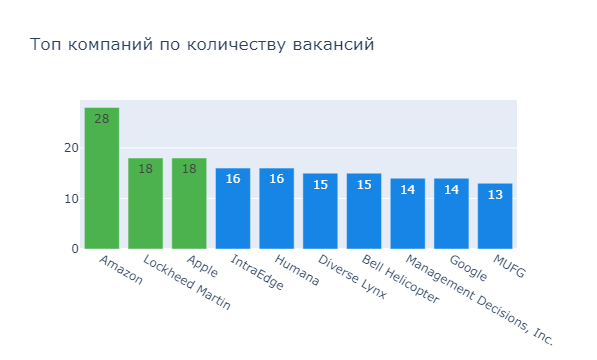

In [27]:
fig = go.Figure()
data = pd.DataFrame(df.groupby(by='company_name')
                    .agg(job_counts=('job_title', 'count')[:len(color_map)])
                    .sort_values(by='job_counts', ascending=False)
                    .head(10).reset_index()
                   )

        
fig.add_trace(go.Bar(x=data.company_name, 
                     y=data.job_counts,
                     text = data["job_counts"],
                     marker = dict(color = color_map_axis)))

fig.update_layout(title_text='Топ компаний по количеству вакансий')

fig.show()

### 2. Построить график самых популярный названий в вакансиях

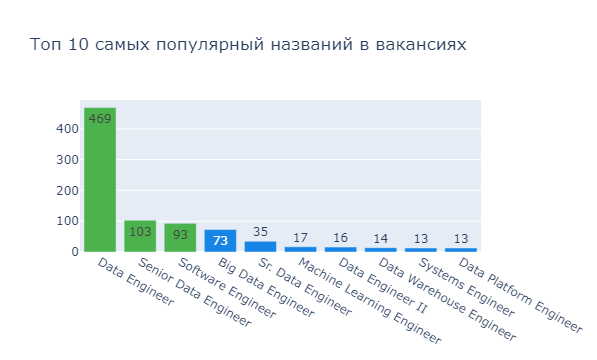

In [28]:
data = pd.DataFrame(df.groupby(by='job_title')
                    .agg(counts=('job_title', 'count')[:len(color_map)])
                    .sort_values(by='counts', ascending=False)
                    .head(10).reset_index())

fig = go.Figure()

def SetColor(counts):
        if(counts >= 93):
            return "red"
        else:
            return "black"

fig.add_trace(go.Bar(x=data.job_title, 
                     y=data.counts,
                     text = data["counts"],
                     marker=dict(color = color_map_axis)))

fig.update_layout(title_text='Топ 10 самых популярный названий в вакансиях')


fig.show()

### 3. Построить график самых популярных местоположений вакансий по их численности и построить круговую диаграмму

TypeError: unhashable type: 'numpy.ndarray'

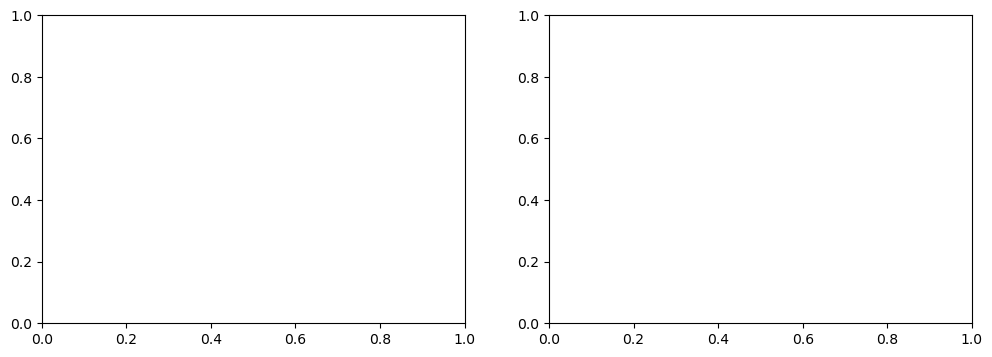

In [29]:
data = pd.DataFrame(df.groupby(by='location')
                    .agg(job_counts=('job_title', 'count')[:len(color_map)])
                    .sort_values(by='job_counts', ascending=False)
                    .head(10).reset_index())

color_map = ['#000000' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] =  '#ff0000'

# initialize the figure
plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Constants = parameters controling the plot layout:
upperLimit = 30
lowerLimit = 1
labelPadding = 30

# Compute max and min in the dataset
max = data['job_counts'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * data.job_counts + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(data.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(data.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color=color_map,alpha=0.8
)

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, data.location):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, fontsize=10,fontfamily='serif',
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 

### Построить график популярности по колонке Type of ownership, относительно численности вакансий

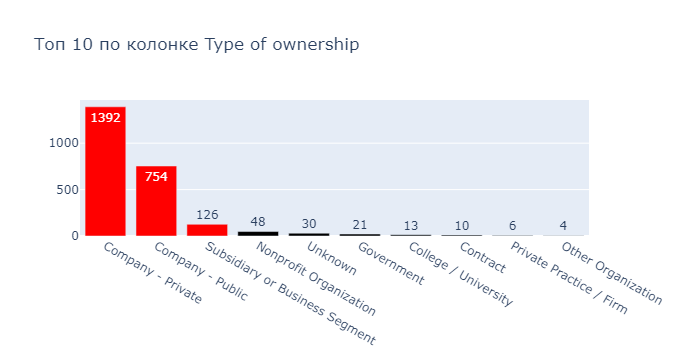

In [292]:
data = pd.DataFrame(df[df['type_of_ownership'] != '-1'].groupby(by='type_of_ownership')
                    .agg(counts=('job_title', 'count'))
                    .sort_values(by='counts', ascending=False)
                    .head(10).reset_index())

fig = go.Figure()

def SetColor(counts):
        if(counts >= 126):
            return "red"
        else:
            return "black"

fig.add_trace(go.Bar(x=data.type_of_ownership, 
                     y=data.counts,
                     text = data["counts"],
                     marker=dict(color = list(map(SetColor, data.counts)))))

fig.update_layout(title_text='Топ 10 по колонке Type of ownership')


fig.show()

### Построить график популярности по секторам работы

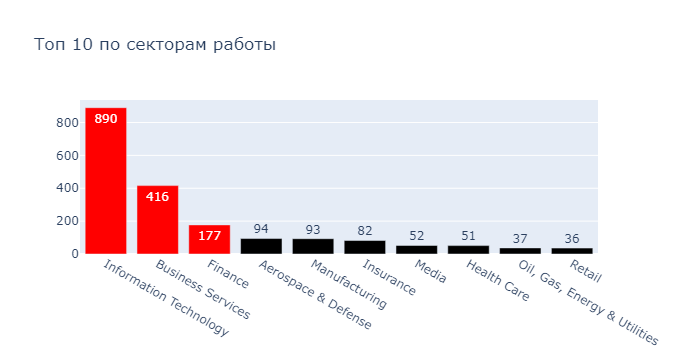

In [293]:
data = pd.DataFrame(df[df['sector'] != '-1'].groupby(by='sector')
                    .agg(counts=('job_title', 'count'))
                    .sort_values(by='counts', ascending=False)
                    .head(10).reset_index())

fig = go.Figure()

def SetColor(counts):
        if(counts >= 177):
            return "red"
        else:
            return "black"

fig.add_trace(go.Bar(x=data.sector, 
                     y=data.counts,
                     text = data["counts"],
                     marker=dict(color = list(map(SetColor, data.counts)))))

fig.update_layout(title_text='Топ 10 по секторам работы')


fig.show()

### Построить график используя сектора работы и средний уровень зарплат в них

In [294]:
def salary(row):
    min_val = int(''.join([i for i in row['salary_estimate'] if i.isdecimal() or i == '-']).split('-')[0])
    max_val = int(''.join([i for i in row['salary_estimate'] if i.isdecimal() or i == '-']).split('-')[1])
    return round((max_val + min_val)/2 * 100)

df['salary_mean'] = df.apply(salary,axis=1)

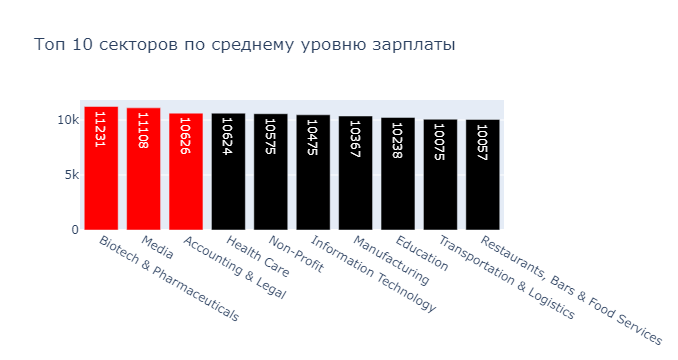

In [295]:
data = pd.DataFrame(df.groupby(by='sector').agg(job_counts=('job_title', 'count'),
                                     mean_salary=('salary_mean', 'mean'))
        .sort_values(by='mean_salary', ascending=False).head(10).reset_index())

fig = go.Figure()

def SetColor(mean_salary):
        if(mean_salary >= 10625):
            return "red"
        else:
            return "black"

fig.add_trace(go.Bar(x=data.sector, 
                     y=data.mean_salary,
                     text = round(data["mean_salary"]),
                     marker=dict(color = list(map(SetColor, data.mean_salary)))))

fig.update_layout(title_text='Топ 10 секторов по среднему уровню зарплаты')


fig.show()

### Построить гистограмму распределения рейтинга компаний

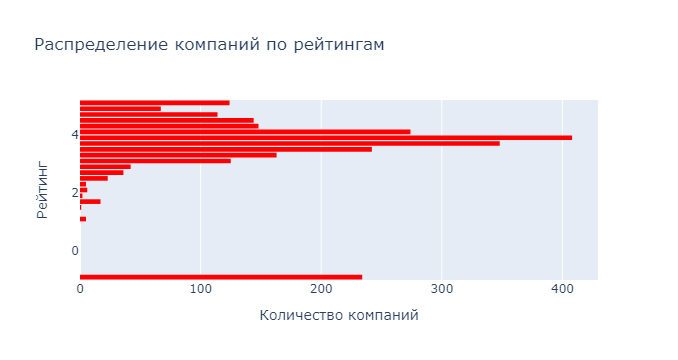

In [296]:
data = df.rating

fig = go.Figure()

fig.add_trace(go.Histogram(y=data, marker_color='red'))

fig.update_layout(
    title_text='Распределение компаний по рейтингам', 
    xaxis_title_text='Количество компаний', 
    yaxis_title_text='Рейтинг', 
    bargap=0.2
)
fig.show()

### Построить график средних зарплат по популярным компаниям

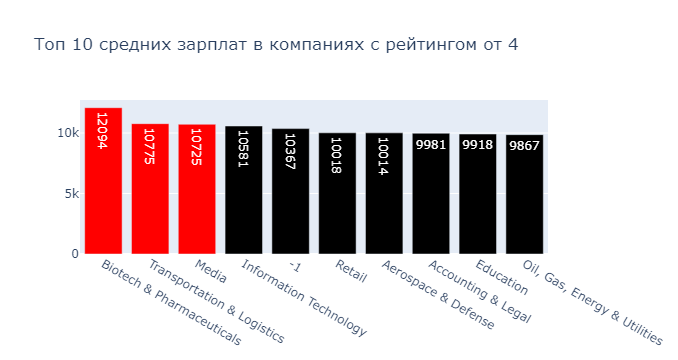

In [297]:
data = pd.DataFrame(df[df['rating'] >= 4].groupby(by='sector').agg(job_counts=('job_title', 'count'),
                                     mean_salary=('salary_mean', 'mean'))
        .sort_values(by='mean_salary', ascending=False).head(10).reset_index())

fig = go.Figure()

def SetColor(mean_salary):
        if(mean_salary >= 10725):
            return "red"
        else:
            return "black"

fig.add_trace(go.Bar(x=data.sector, 
                     y=data.mean_salary,
                     text = round(data["mean_salary"]),
                     marker=dict(color = list(map(SetColor, data.mean_salary)))))

fig.update_layout(title_text='Топ 10 средних зарплат в компаниях с рейтингом от 4')


fig.show()

### Построить описаний вакансий облако тегов, исследовать самые популярные слова

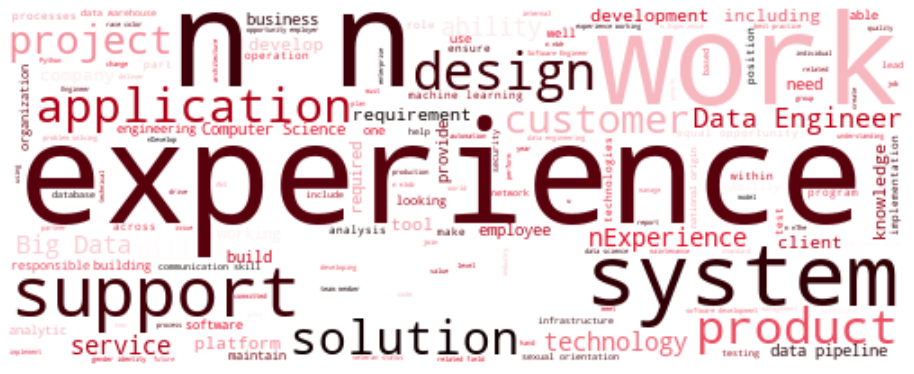

In [298]:
from wordcloud import WordCloud
import random
from PIL import Image
import matplotlib

# Custom colour map based on Netflix palette
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#000000', '#e1011c', '#ffffff'])

text = str(list(df.job_description)).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')

wordcloud = WordCloud(background_color = 'white', width = 500,  height = 200,colormap=cmap, max_words = 150).generate(text)

plt.figure( figsize=(15,5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()